Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6111
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1619
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 13/50
16/16 [==============================

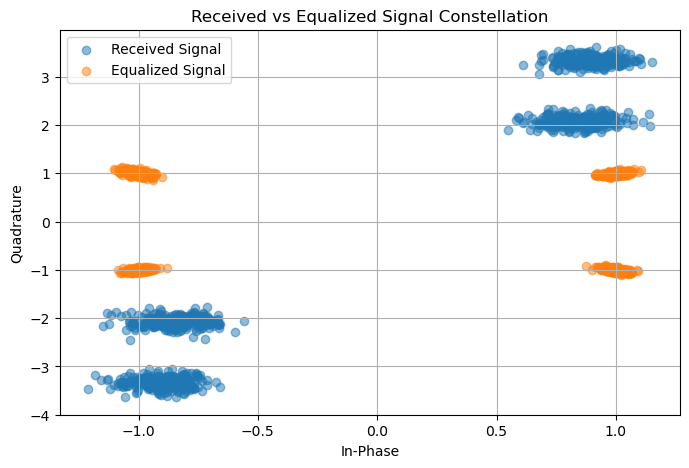

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_dnn_model(input_shape, num_tx):
    """
    Build a deep neural network (DNN) model for blind channel equalization.
    
    Parameters:
    input_shape (tuple): Shape of the input data (number of received signal dimensions).
    num_tx (int): Number of transmitting antennas for output layer dimensions.
    
    Returns:
    model (Sequential): Compiled DNN model.
    """
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape[0], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2 * num_tx, activation='linear'))  # Output layer for real and imaginary parts of all transmitters
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Example Usage
if __name__ == "__main__":
    np.random.seed(42)
    num_tx = 2  # Number of transmitting antennas
    num_rx = 3  # Number of receiving antennas
    num_samples = 1000  # Number of received samples
    
    # Generate a random transmitted signal X (QPSK-like signal)
    X = np.sign(np.random.randn(num_tx, num_samples) + 1j * np.random.randn(num_tx, num_samples))
    
    # Generate a random channel matrix H (ground truth)
    H_true = np.random.randn(num_rx, num_tx) + 1j * np.random.randn(num_rx, num_tx)
    
    # Simulate received signal Y = H * X + Noise
    noise = 0.1 * (np.random.randn(num_rx, num_samples) + 1j * np.random.randn(num_rx, num_samples))
    Y = H_true @ X + noise
    
    # Convert the received signal Y to real and imaginary parts for DNN input
    Y_real_imag = np.vstack((np.real(Y), np.imag(Y))).T  # Shape: (num_samples, 2 * num_rx)
    
    # Convert the transmitted signal X to real and imaginary parts for DNN output
    X_real_imag = np.vstack((np.real(X), np.imag(X))).T  # Shape: (num_samples, 2 * num_tx)
    
    # Build the DNN model
    model = build_dnn_model((2 * num_rx,), num_tx)  # Input shape is 2 * num_rx for real and imaginary parts
    
    # Train the model
    model.fit(Y_real_imag, X_real_imag, epochs=50, batch_size=64)
    
    # Predict the equalized signal
    equalized_signal_real_imag = model.predict(Y_real_imag)
    
    # Convert the predicted equalized signal back to complex form
    equalized_signal = equalized_signal_real_imag[:, 0] + 1j * equalized_signal_real_imag[:, 1]
    
    # Compute Mean Squared Error (MSE) between transmitted and equalized signal
    mse = np.mean(np.abs(X - equalized_signal) ** 2)
    print("Mean Squared Error (MSE) after DNN equalization:", mse)
    
    # Plot received vs equalized signal constellation
    plt.figure(figsize=(8, 5))
    plt.scatter(np.real(Y[0, :]), np.imag(Y[0, :]), alpha=0.5, label='Received Signal')
    plt.scatter(np.real(equalized_signal), np.imag(equalized_signal), alpha=0.5, label='Equalized Signal')
    plt.xlabel("In-Phase")
    plt.ylabel("Quadrature")
    plt.title("Received vs Equalized Signal Constellation")
    plt.legend()
    plt.grid()
    plt.show()
